In [33]:
import city_class_test
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
import numpy as np
from itertools import chain

In [53]:
%timeit
city = city_class_test.City(n=100)
# city.grid

In [54]:
def time(city):
    for _ in range(10):
        city.step()
time(city)

In [55]:
activity_grid = np.array([obj.value for row in city.grid for obj in row]).reshape(100,100)

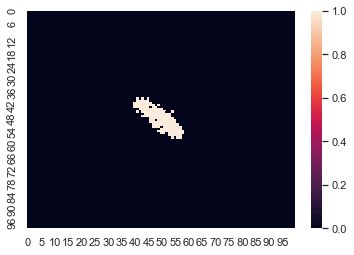

In [56]:
fig = plt.figure()
sns.heatmap(activity_grid)
fig.savefig('first_run.jpg')